In [103]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


### Define the problem 

    Given: set of individual heigts and weigths, ladeled as 'Adult' and 'Child'
    40 children -> Gaussian([120,50],[91,10],[10,40])
    120 adults -> Gaussian([150,80],[60,10],[10,40])
    
    Gaol:Fit a neive Bayesian Classifier, to calssify data:[[180,90][110,20],[130,60]]



### Prepare the data (Data Preprocesing)

#### Load the data

In [104]:
# gen X
np.random.seed(1111)
children = np.random.multivariate_normal([120, 40], [[90,10],[10,60]], size=40)
adults   = np.random.multivariate_normal([150, 80], [[60,10],[10,60]], size=120)

X = np.concatenate((children ,adults),axis=0)

# gen y
y1 = np.zeros(len(children), dtype="int8")
y2 = np.ones(len(adults), dtype="int8")
y = np.concatenate((y1,y2),axis=0)

print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')

print(X[0],y[0])
print(X[102],y[102])

X.shape: (160, 2)
y.shape: (160,)
[134.34764302  35.88211236] 0
[144.70967256  93.29531351] 1


### Get insight of the Data (Prepare and clean)

In [105]:
df = pd.DataFrame({
    'height': X[:,0].round(decimals=2),
    'weight': X[:,1].round(decimals=2),
    'y': y
})
df

,height,weight,y
0,134.35,35.88,0
1,114.63,31.45,0
2,106.19,35.63,0
3,119.57,32.25,0
4,135.03,42.95,0
...,...,...,...
155,132.74,66.59,1
156,138.10,81.29,1
157,153.90,81.21,1
158,142.25,73.74,1


### Clean 

    No need

### Visualize with Seaborn 


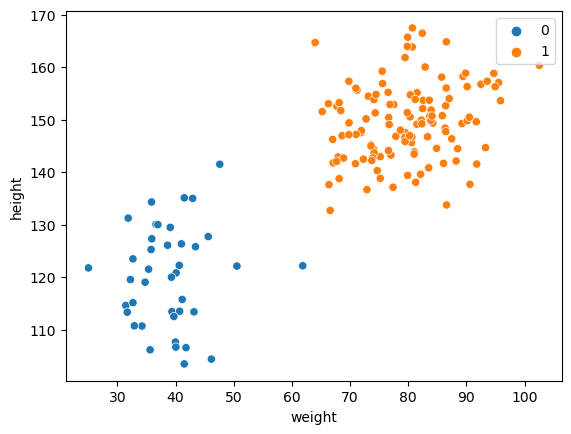

In [106]:
ax = sns.scatterplot(x=df.weight, y=df.height, hue=y)

### Select features 

### Separate the training data from the test data


In [107]:
X_train,X_test, y_train, y_test = train_test_split(X,y)
print (f'X_train: {X_train[:5]}\n',f'y_train: {y_train[:5]}\n')
print (f'X_test: {X_test[:5]}\n',f'y_test: {y_test[:5]}\n')

X_train: [[137.7214765   90.6210102 ]
 [149.42017236  69.83290409]
 [149.30068318  89.25187775]
 [147.9352203   71.9395042 ]
 [127.75930727  45.6173017 ]]
 y_train: [1 1 1 1 0]

X_test: [[143.48028269  81.02752222]
 [165.74000991  79.91171511]
 [144.51477435  88.50532684]
 [150.56713597  80.3248987 ]
 [122.28356625  40.64187508]]
 y_test: [1 1 1 1 0]



### Choose the model 

    GaussianNB implements the Gaussian Naive Bayes algorith for classification.The likelihood of the features is assumed to be Gaussian:



### Train the model ( FIT )


In [108]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(X_train, y_train)
clf

GaussianNB()

### Predict (classify unknown input sample)


In [109]:
y_pred = clf.predict(X_test)
#print(y_pred)
#print(y_test)

### Evaluete the model 

    Check the Precisiom and recall of the system

In [112]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred, target_names=['children', 'adults']))


1.0
              precision    recall  f1-score   support

    children       1.00      1.00      1.00        12
      adults       1.00      1.00      1.00        28

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

